In [26]:
import pandas as pd
# Get player counts over time for DE and HD
steam_de = pd.read_csv('inputs/chart-de.csv', usecols=['DateTime', 'Players'])
steam_hd = pd.read_csv('inputs/chart-hd.csv', usecols=['DateTime', 'Players'])


In [27]:
display(steam_de.info())
steam_de.set_index('DateTime')
steam_de.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  802 non-null    object
 1   Players   802 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.7+ KB


None

,DateTime,Players
0,2019-11-14 00:00:00,21797
1,2019-11-15 00:00:00,20594
2,2019-11-16 00:00:00,26163
3,2019-11-17 00:00:00,26767
4,2019-11-18 00:00:00,19596


In [28]:
display(steam_hd.info())
# Clean up the HD data:
# We have 3220 Dates but only 3166 Player values so some null values exist.
# We can impute data by interpolating player counts. Then round down fractional players and cast back to int
steam_hd.set_index('DateTime')
steam_hd.interpolate(method='linear', inplace=True)
steam_hd['Players'] = steam_hd['Players'].round()
steam_hd = steam_hd.astype({'Players': int})
display(steam_hd.info())
steam_hd.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  3220 non-null   object 
 1   Players   3166 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  3220 non-null   object
 1   Players   3220 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.4+ KB


None

,DateTime,Players
0,2013-04-01 00:00:00,11761
1,2013-04-02 00:00:00,11830
2,2013-04-03 00:00:00,11900
3,2013-04-04 00:00:00,11969
4,2013-04-05 00:00:00,10988


# What info do we have?
- number of players per day since release of age of empires ii: definitive edition and age of empires: hd
- limited to steam players

# What could we do with this?
- compare against other games in the age series if we get the charts for those. this could help us understand the popularity of age
- compare against other top games or other RTS games (e.g., starcraft? but that's not on steam)

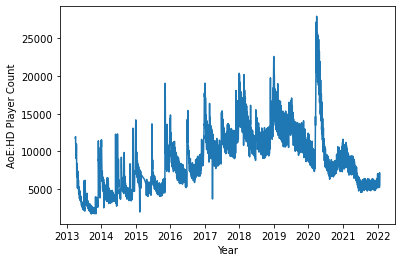

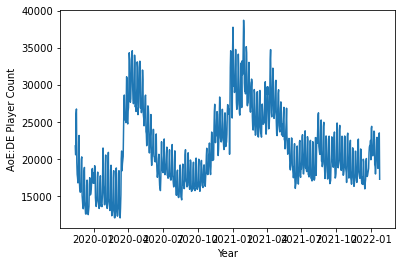

In [37]:
# Let's try to compare players in HD vs DE
# First, let's plot the two graphs then we will try to join the data and graph both together in one graph!

import matplotlib.pyplot as plt

hd_days = pd.to_datetime(steam_hd['DateTime'])
plt.plot(hd_days, steam_hd['Players'])
plt.ylabel('AoE:HD Player Count')
plt.xlabel('Year')
plt.show()

de_days = pd.to_datetime(steam_de['DateTime'])
plt.plot(de_days, steam_de['Players'])
plt.ylabel('AoE:DE Player Count')
plt.xlabel('Year')
plt.show()


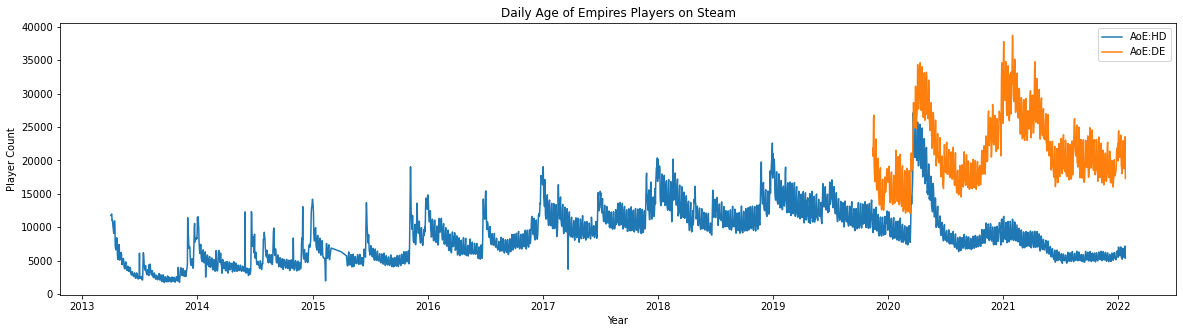

In [63]:
# Merge HD and DE and plot them together
import matplotlib.patches as mpatches

de_hd = pd.merge(steam_hd, steam_de, on='DateTime', suffixes=['_HD', '_DE'], how='outer')

hd_days = pd.to_datetime(de_hd['DateTime'])
de_days = pd.to_datetime(de_hd['DateTime'])

plt.figure(figsize=(20,5))
ax = plt.subplot()
ax.plot(hd_days, de_hd['Players_HD'], label='AoE:HD')
ax.plot(de_days, de_hd['Players_DE'], label='AoE:DE')
ax.legend()
plt.title('Daily Age of Empires Players on Steam')
plt.ylabel('Player Count')
plt.xlabel('Year')
plt.show()
